<a href="https://colab.research.google.com/github/PrashanthiThirunahari/23CSBTB50/blob/main/AIML_ASG_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## implementation of Linear Regression on Housing Data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
housing=pd.read_csv("Housing.csv")
print(housing.head())
housing.shape
housing.info()
housing.describe()



      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
housing.isnull().sum()*100/housing.shape[0]

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


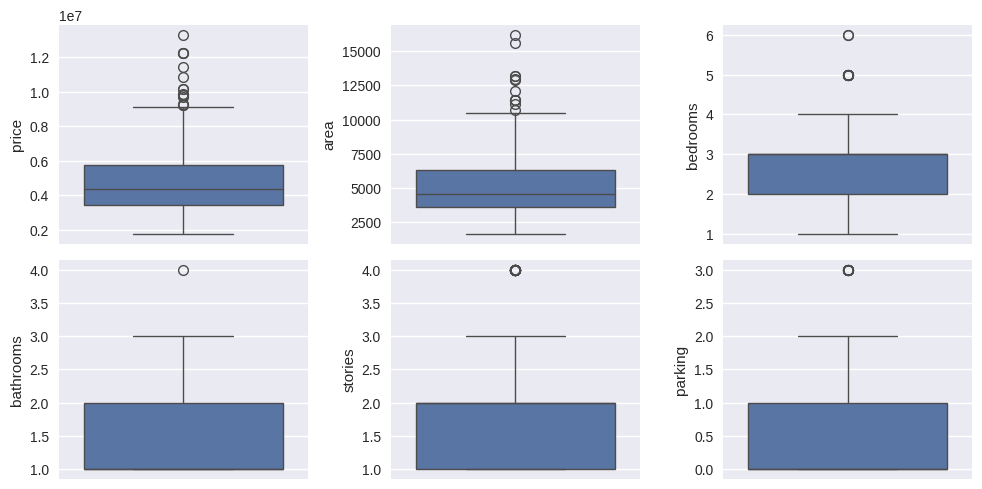

In [13]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

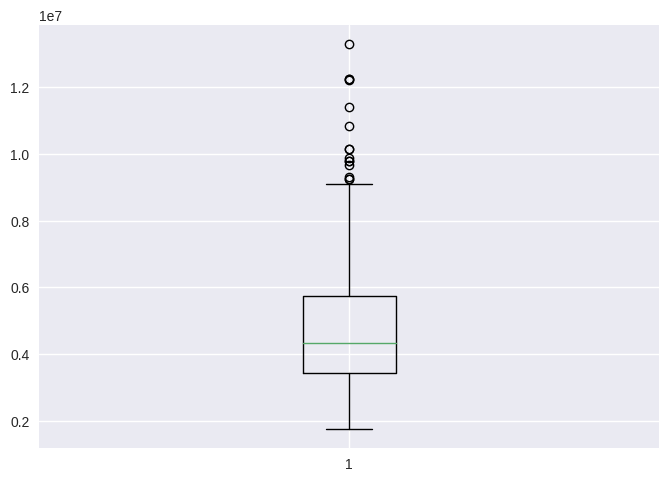

In [14]:
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]


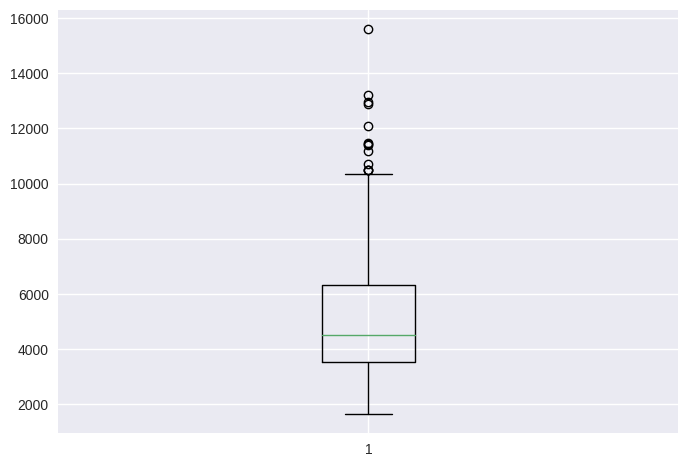

In [15]:
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

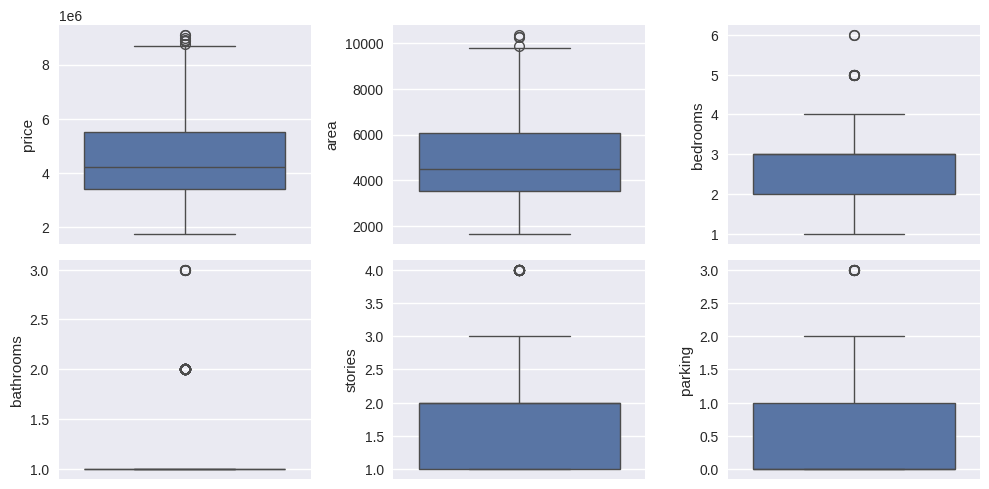

In [16]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

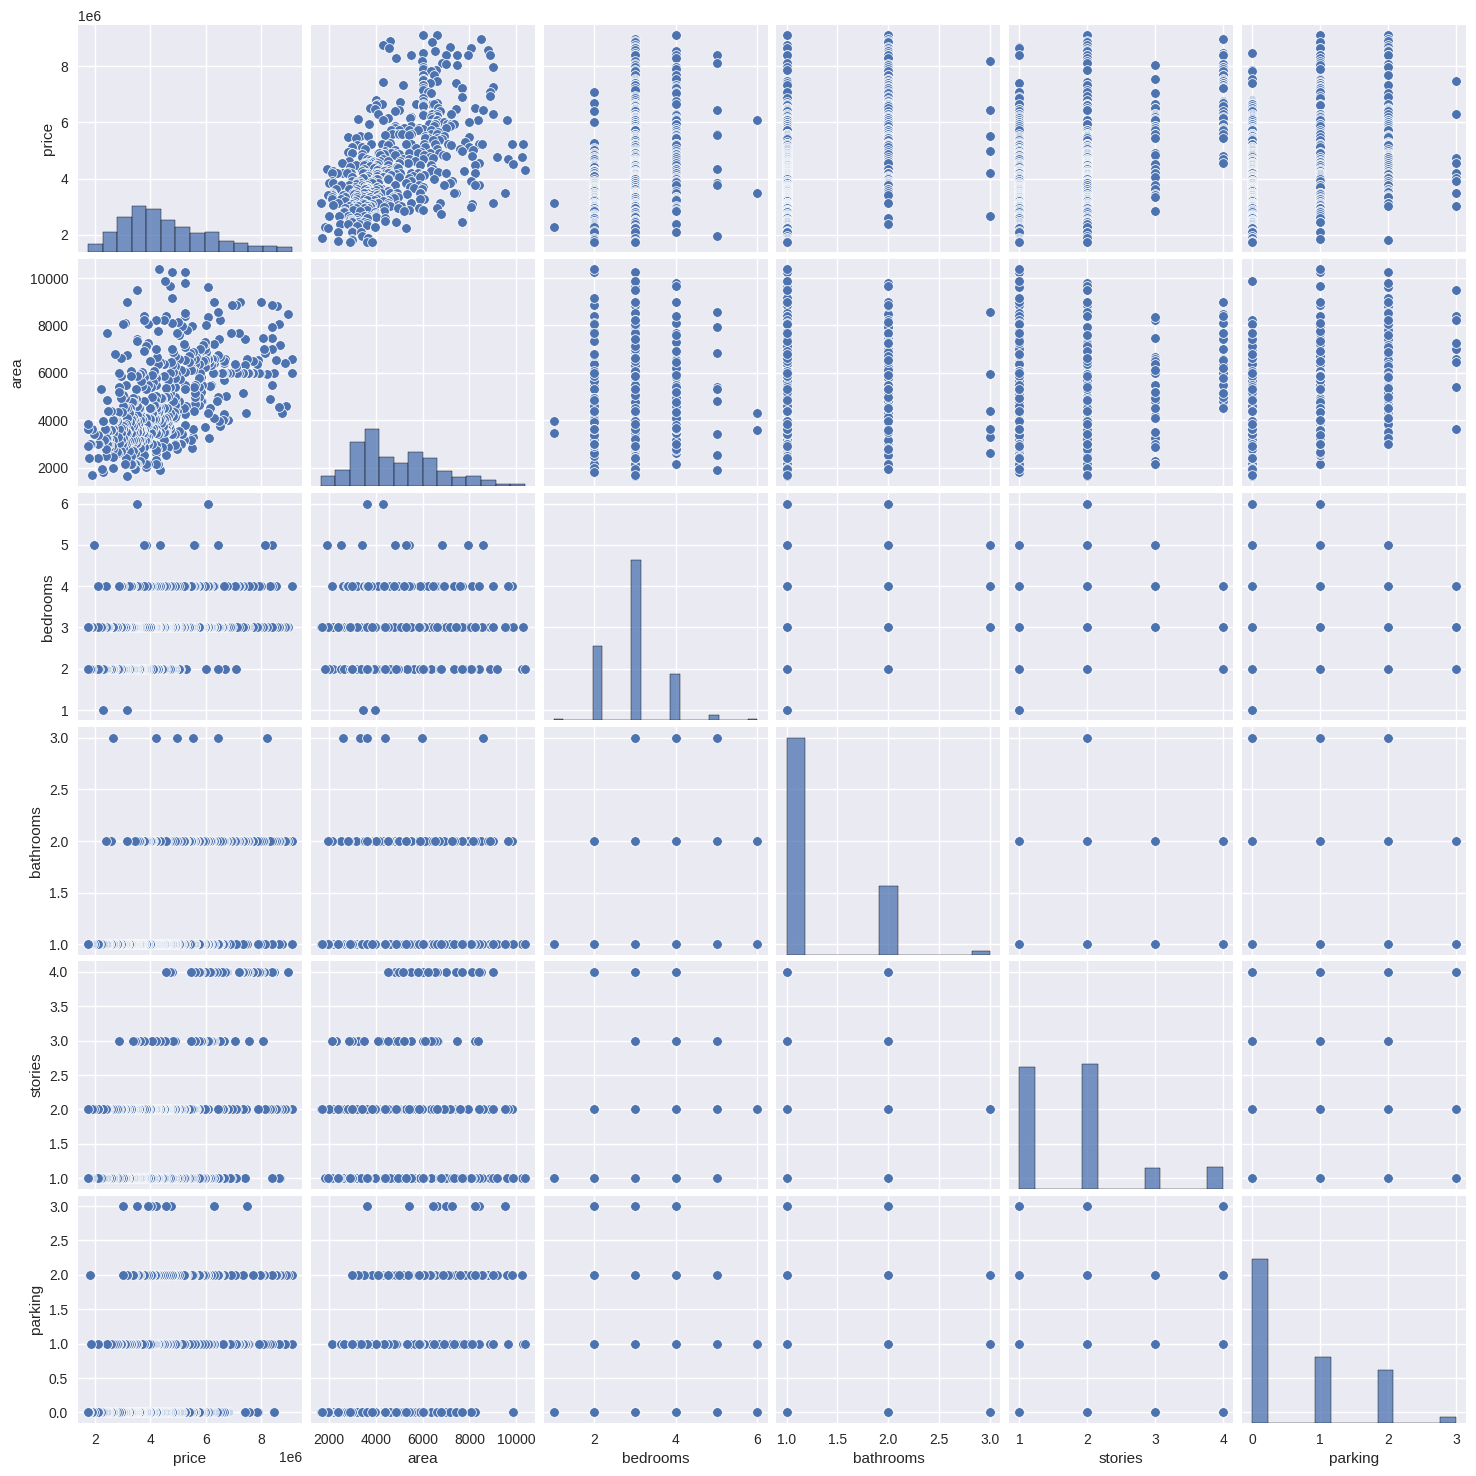

In [17]:
sns.pairplot(housing)
plt.show()

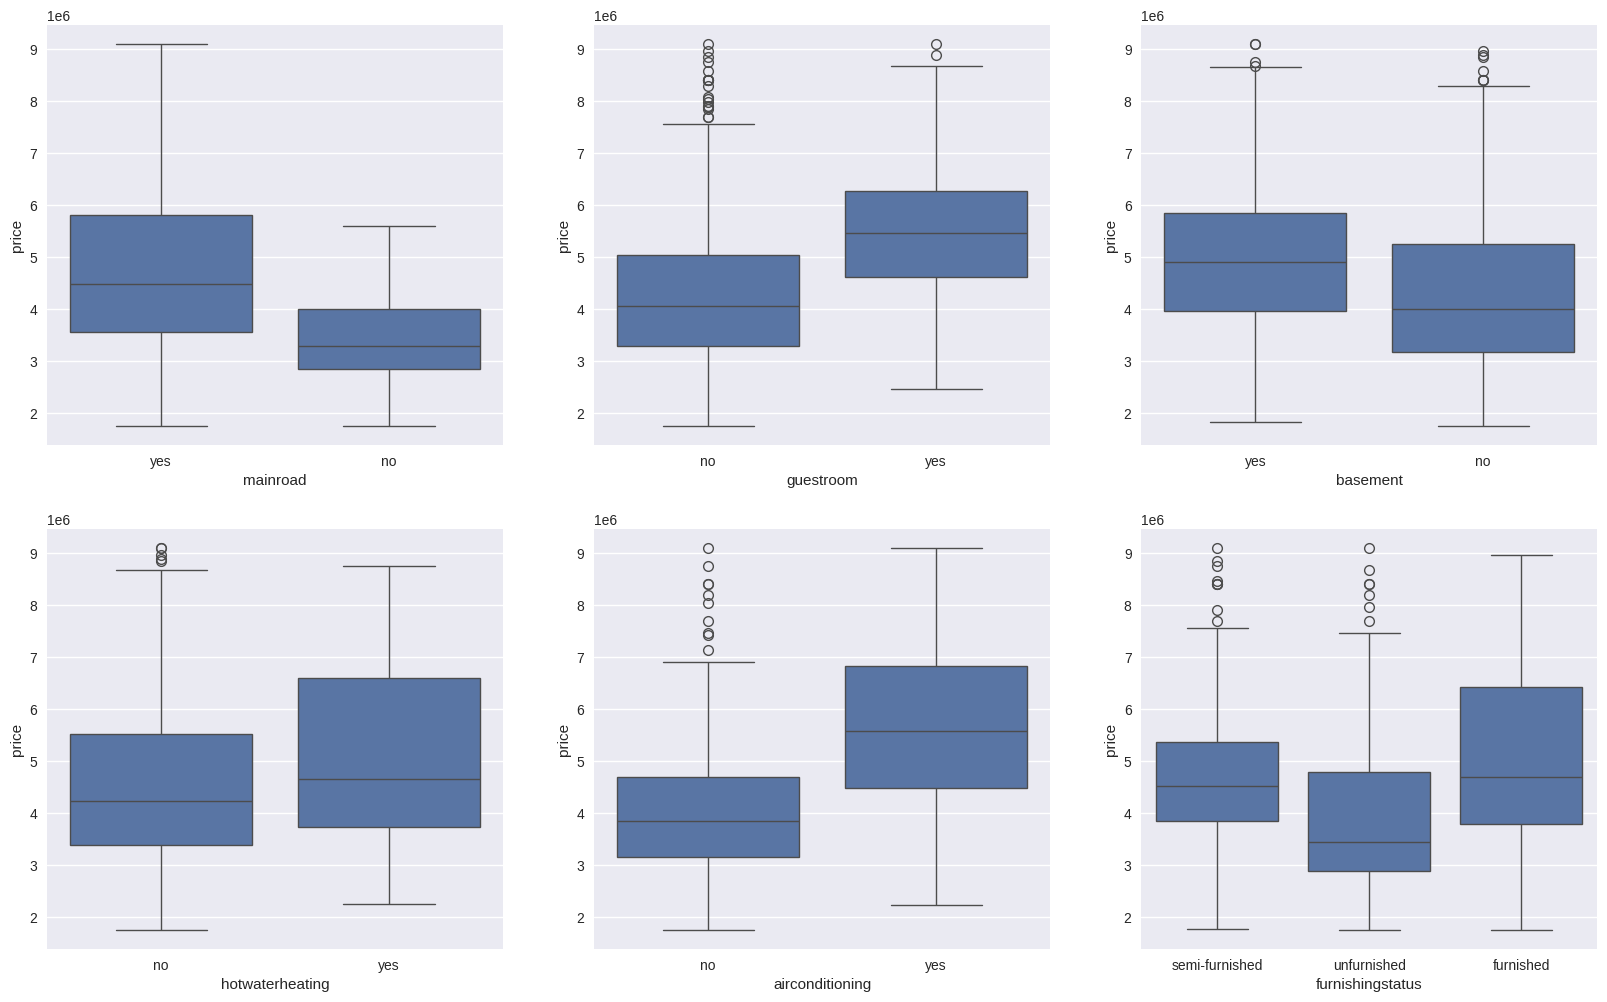

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

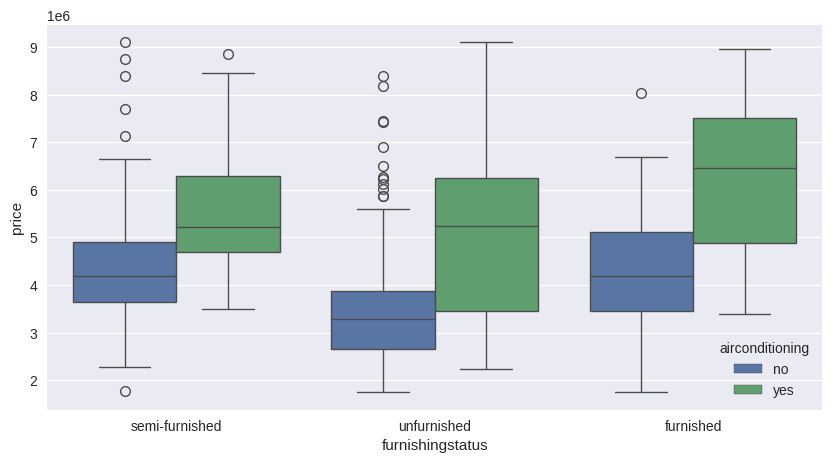

In [19]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [21]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
    housing[varlist] = housing[varlist].apply(binary_map)

In [22]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [23]:
status = pd.get_dummies(housing['furnishingstatus'])

In [24]:
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [25]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [26]:
housing = pd.concat([housing, status], axis = 1)

In [27]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,True,False
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,False,True
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished,False,False
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished,False,False
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished,True,False


In [28]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [29]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,True,False
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,False,True
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,False,False
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,False,False
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,True,False


In [30]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,yes,no,no,no,no,0.000000,yes,True,False
236,0.390476,0.114134,0.2,0.0,0.333333,yes,yes,yes,no,no,0.000000,yes,True,False
356,0.275238,0.072738,0.8,0.5,0.000000,no,no,yes,no,yes,0.333333,no,False,False
425,0.219048,0.151390,0.2,0.0,0.000000,yes,no,yes,no,no,0.666667,no,False,False
516,0.095238,0.157895,0.2,0.0,0.000000,no,yes,no,no,no,0.333333,no,False,True


In [34]:
df_train.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.218837
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.287286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


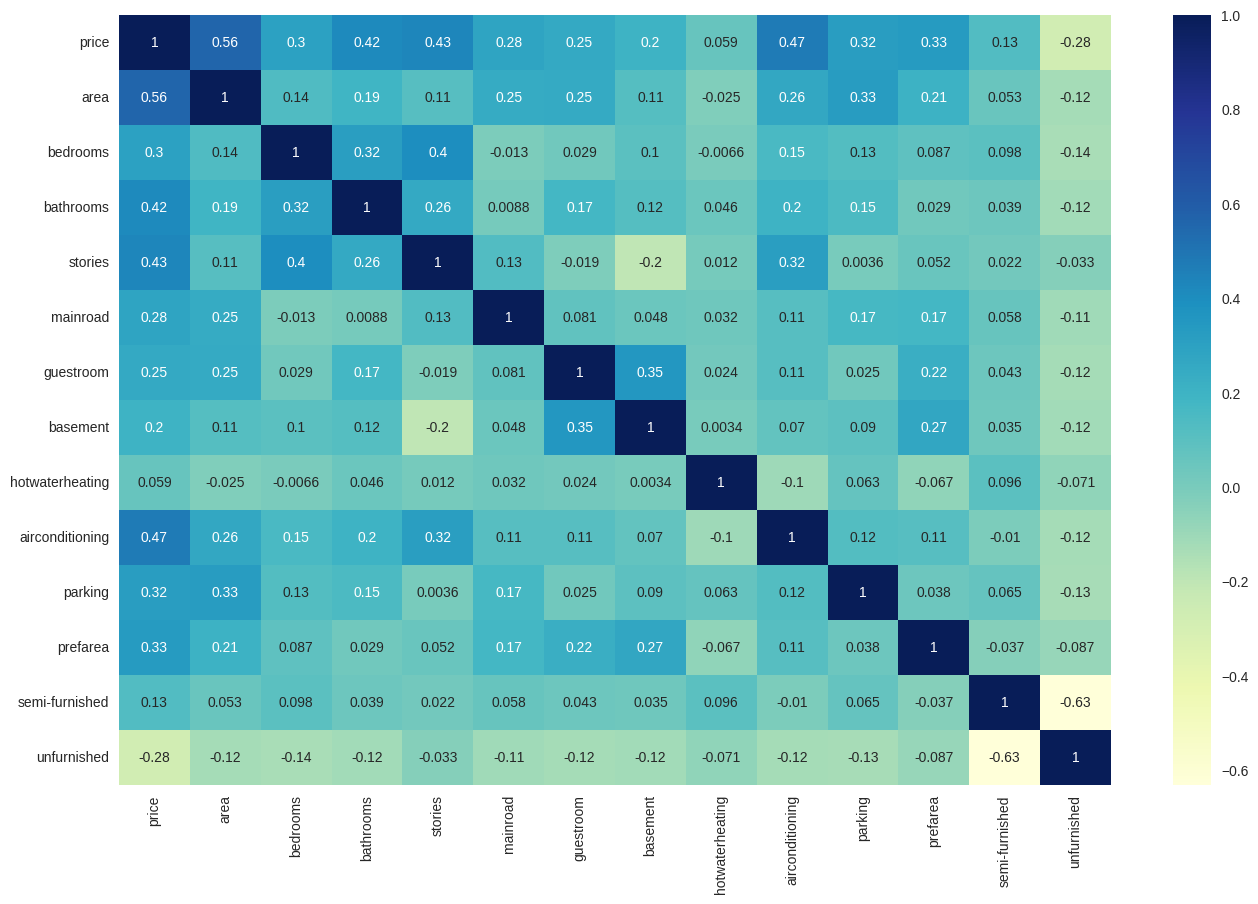

In [38]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':  # Check if the column is of object type
        df_train[column] = df_train[column].map({'yes': 1, 'no': 0})

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [39]:
y_train = df_train.pop('price')
X_train = df_train

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
rfe = RFE(lm, n_features_to_select=6)             # running RFE with keyword argument for n_features_to_select
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [48]:
X_train_rfe = X_train[col]

In [49]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [51]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           1.31e-69
Time:                        06:47:51   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.51
1,area,1.24
4,airconditioning,1.20
3,stories,1.17
5,parking,1.14
2,bathrooms,1.12
6,prefarea,1.05


In [54]:
y_train_price = lm.predict(X_train_rfe)

In [55]:
res = (y_train_price - y_train)

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

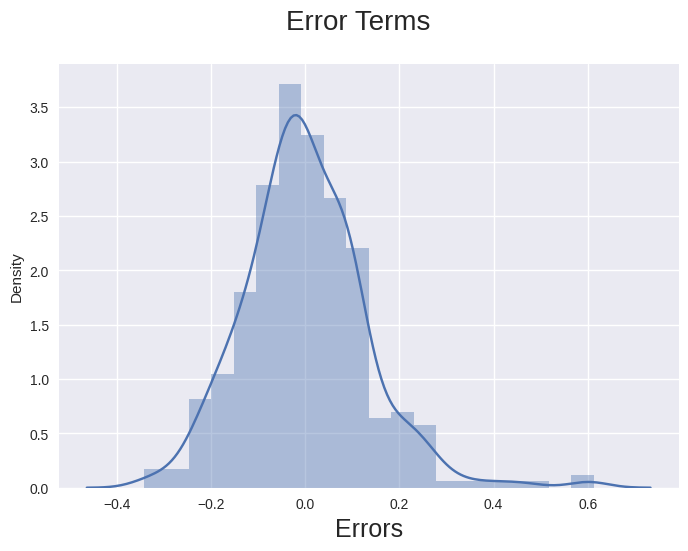

In [57]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

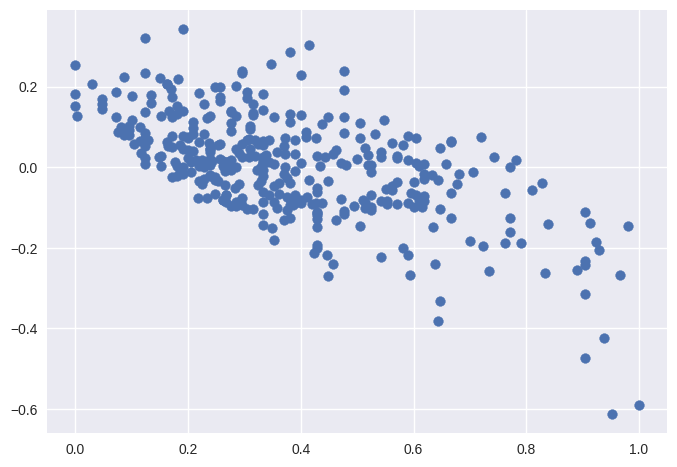

In [58]:
plt.scatter(y_train,res)
plt.show()


In [59]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [61]:

df_test = pd.get_dummies(df_test, columns=['airconditioning', 'prefarea'])


num_vars = ['area', 'stories', 'bathrooms', 'parking','price']


df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [62]:
y_test = df_test.pop('price')
X_test = df_test

In [63]:
X_test = sm.add_constant(X_test)

In [67]:
common_cols = X_train_rfe.columns.intersection(X_test.columns)
X_test_rfe = X_test[common_cols]

In [71]:
X_test_rfe = sm.add_constant(X_test_rfe)
missing_cols = X_train_rfe.columns.difference(X_test_rfe.columns)
for col in missing_cols:
    X_test_rfe[col] = 0
    y_pred = lm.predict(X_test_rfe)

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4884383114287676

Text(0, 0.5, 'y_pred')

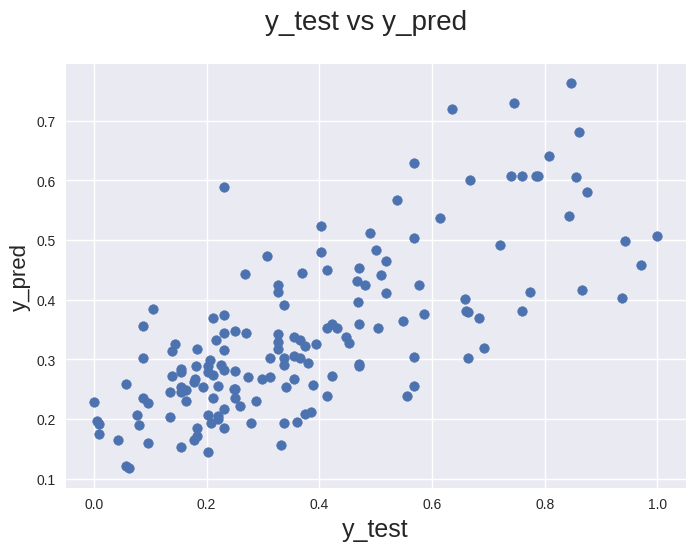

In [73]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)